# Linear Regression

Five experiments are going to be carried out, in order to analyze *linear regression*.

## Preparation of the dataset

In [1]:
# Usual imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

random_state = 94922767 # this will be used to guarantee the repeatability of the experiment

In [2]:
# Import the dataset
df = pd.read_csv('FoodUK2014.csv', sep = ';')

# Show the first five rows
df.head(n = 20)

,hhsize,quarter,adults_n,children_n,totalexp,SexHRP,month,Gorx,Year,income,AgeHRP,qmeat,qfish,qfv,xmeat,xfish,xfv,uvmeat,uvfish,uvfv
0,4,April to June,2,2,556,Female,April,West Midlands,2014,986,34,14.0,NaN,37.0,96.0,NaN,69.0,7.0,NaN,2.0
1,4,July to September,2,2,738,Male,August,North East,2014,825,38,6.0,1.0,30.0,53.0,7.0,63.0,9.0,10.0,2.0
2,2,October to December,2,0,331,Male,October,Northern Ireland,2014,272,54,12.0,2.0,17.0,94.0,28.0,43.0,8.0,14.0,3.0
3,2,April to June,2,0,537,Male,June,North West and Merseyside,2014,611,64,3.0,NaN,4.0,17.0,NaN,5.0,6.0,NaN,1.0
4,3,April to June,3,0,881,Male,April,East Midlands,2014,496,64,13.0,3.0,7.0,74.0,17.0,19.0,6.0,6.0,3.0
5,4,January to March,2,2,372,Male,February,Wales,2014,267,70,36.0,2.0,27.0,303.0,29.0,87.0,8.0,16.0,3.0
6,1,July to September,1,0,848,Female,September,London,2014,789,53,1.0,NaN,10.0,10.0,NaN,31.0,8.0,NaN,3.0
7,3,January to March,3,0,152,Male,January,Eastern,2014,403,64,12.0,3.0,7.0,72.0,26.0,17.0,6.0,9.0,3.0
8,1,July to September,1,0,119,Male,August,London,2014,89,79,5.0,NaN,18.0,25.0,NaN,44.0,5.0,NaN,2.0
9,2,January to March,2,0,828,Male,February,North West and Merseyside,2014,1113,72,10.0,0.0,30.0,85.0,4.0,89.0,9.0,10.0,3.0


In [3]:
# And a short description
df.describe(include = 'all')

,hhsize,quarter,adults_n,children_n,totalexp,SexHRP,month,Gorx,Year,income,AgeHRP,qmeat,qfish,qfv,xmeat,xfish,xfv,uvmeat,uvfish,uvfv
count,5114.000000,5114,5114.000000,5114.000000,5114.000000,5114,5114,5114,5114.0,5114.000000,5114.000000,4873.000000,3542.000000,5017.000000,4873.000000,3542.000000,5017.000000,4873.000000,3542.000000,5017.000000
unique,NaN,4,NaN,NaN,NaN,2,12,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,April to June,NaN,NaN,NaN,Male,February,South East,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1341,NaN,NaN,NaN,3050,445,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.363707,NaN,1.841807,0.521901,519.899296,NaN,NaN,NaN,2014.0,679.546343,53.802698,10.467679,2.144833,25.730516,68.113688,19.643422,58.941599,7.072235,9.927442,2.508073
std,1.244704,NaN,0.743052,0.945622,411.539935,NaN,NaN,NaN,0.0,499.581853,16.187912,8.806569,2.063569,18.374871,57.332491,18.728011,44.753698,2.949165,5.488515,1.393188
min,1.000000,NaN,0.000000,0.000000,-247.000000,NaN,NaN,NaN,2014.0,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,NaN,1.000000,0.000000,261.000000,NaN,NaN,NaN,2014.0,307.000000,41.000000,4.000000,1.000000,12.000000,29.000000,7.000000,27.000000,5.000000,6.000000,2.000000
50%,2.000000,NaN,2.000000,0.000000,427.000000,NaN,NaN,NaN,2014.0,548.000000,54.000000,8.000000,2.000000,22.000000,55.000000,14.000000,49.000000,7.000000,9.000000,2.000000
75%,3.000000,NaN,2.000000,1.000000,650.750000,NaN,NaN,NaN,2014.0,925.750000,67.000000,14.000000,3.000000,35.000000,90.000000,26.000000,78.000000,8.000000,13.000000,3.000000


In [4]:
# Number of rows with nulls
# Subtracting, from the original number of rows,
# the number of rows in the dataset without nulls
df.shape[0] - df.dropna().shape[0]

1668

In [5]:
# Shape of the dataset
df.shape

(5114, 20)

In [6]:
# Drop rows which contain missing values.
df = df.dropna(axis = 0).copy()
print(f'After dropping rows with nulls the dataset has {df.dropna(axis = 0).shape[0]} rows')

After dropping rows with nulls the dataset has 3446 rows


In [7]:
df

,hhsize,quarter,adults_n,children_n,totalexp,SexHRP,month,Gorx,Year,income,AgeHRP,qmeat,qfish,qfv,xmeat,xfish,xfv,uvmeat,uvfish,uvfv
1,4,July to September,2,2,738,Male,August,North East,2014,825,38,6.0,1.0,30.0,53.0,7.0,63.0,9.0,10.0,2.0
2,2,October to December,2,0,331,Male,October,Northern Ireland,2014,272,54,12.0,2.0,17.0,94.0,28.0,43.0,8.0,14.0,3.0
4,3,April to June,3,0,881,Male,April,East Midlands,2014,496,64,13.0,3.0,7.0,74.0,17.0,19.0,6.0,6.0,3.0
5,4,January to March,2,2,372,Male,February,Wales,2014,267,70,36.0,2.0,27.0,303.0,29.0,87.0,8.0,16.0,3.0
7,3,January to March,3,0,152,Male,January,Eastern,2014,403,64,12.0,3.0,7.0,72.0,26.0,17.0,6.0,9.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5109,2,October to December,2,0,422,Male,November,East Midlands,2014,680,61,14.0,2.0,22.0,99.0,14.0,39.0,7.0,6.0,2.0
5110,2,July to September,2,0,2028,Male,August,South East,2014,2134,71,7.0,2.0,33.0,114.0,20.0,110.0,15.0,13.0,3.0
5111,1,January to March,1,0,207,Male,March,Eastern,2014,326,33,1.0,1.0,8.0,4.0,10.0,28.0,4.0,7.0,4.0
5112,1,January to March,1,0,300,Female,January,Eastern,2014,359,70,2.0,2.0,12.0,15.0,16.0,32.0,10.0,8.0,3.0


Apply data transformation, converting alphanumeric values into numeric 0 and 1, since sklearn ML algorithms only work with numeric values.

(Suggested by background information).

In [8]:
# Convert alphanumeric values into numeric values (0 and 1)
df['SexHRP'] = df['SexHRP'].apply(lambda x: 0 if (x=='Female') else 1)
df['qmeat_hhsize_ratio'] = df['qmeat']/df['hhsize']
df['income_hhsize_ratio'] = df['income']/df['hhsize']

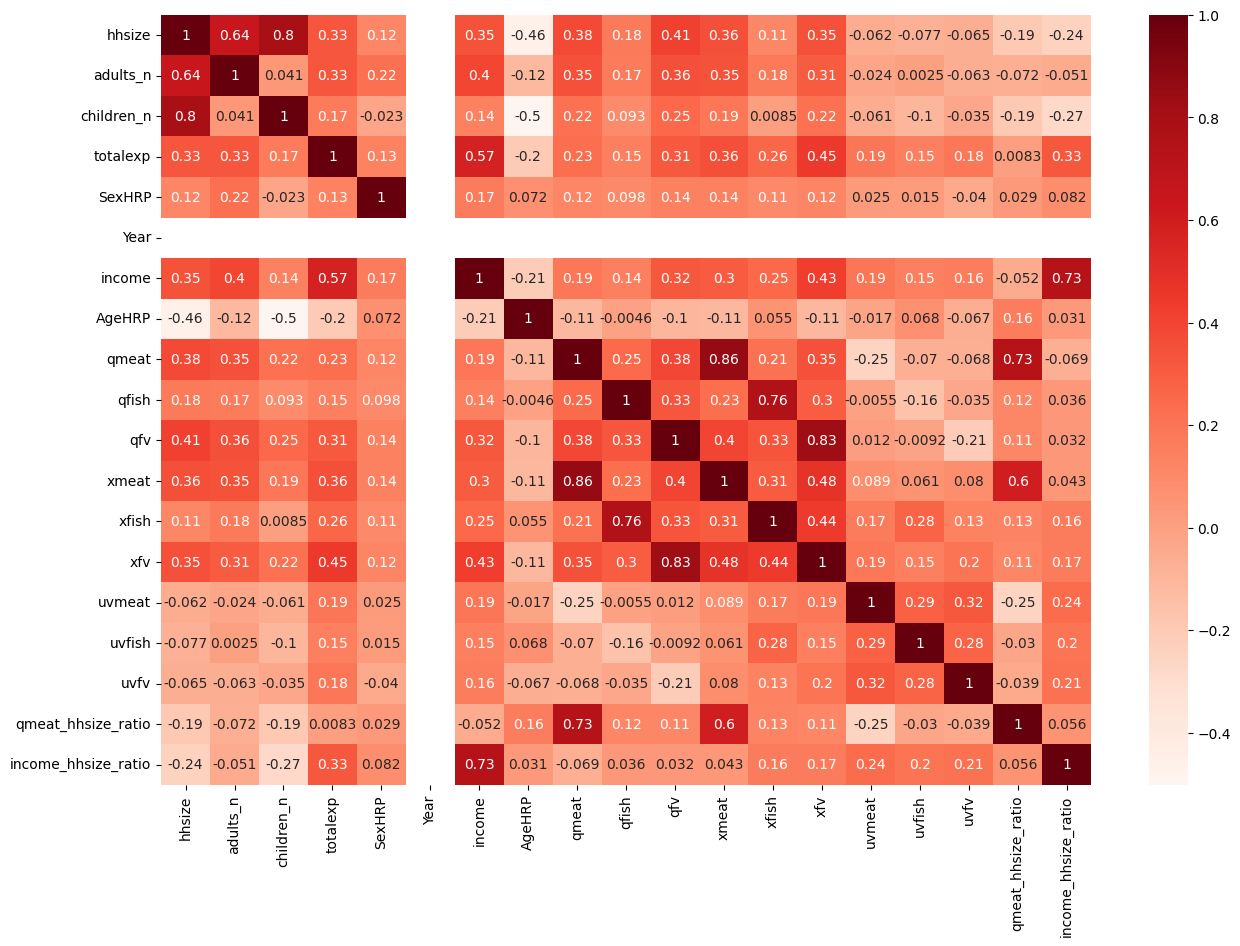

In [9]:
import seaborn as sns
corr = df[df.columns].corr(numeric_only = True
                           )
plt.figure(figsize = (15, 10))
sns.heatmap(corr, cmap = 'Reds', annot=True);

In [10]:
target = 'qmeat_hhsize_ratio'
X = df.drop([target], axis = 1)
y = df[target]

Only consider interesting columns. 


In [11]:
# From background information
df = df[['adults_n', 'children_n', 'SexHRP', 'AgeHRP'
        , 'qmeat_hhsize_ratio', 'income_hhsize_ratio', 'uvmeat']]

df.head()

,adults_n,children_n,SexHRP,AgeHRP,qmeat_hhsize_ratio,income_hhsize_ratio,uvmeat
1,2,2,1,38,1.500000,206.250000,9.0
2,2,0,1,54,6.000000,136.000000,8.0
4,3,0,1,64,4.333333,165.333333,6.0
5,2,2,1,70,9.000000,66.750000,8.0
7,3,0,1,64,4.000000,134.333333,6.0


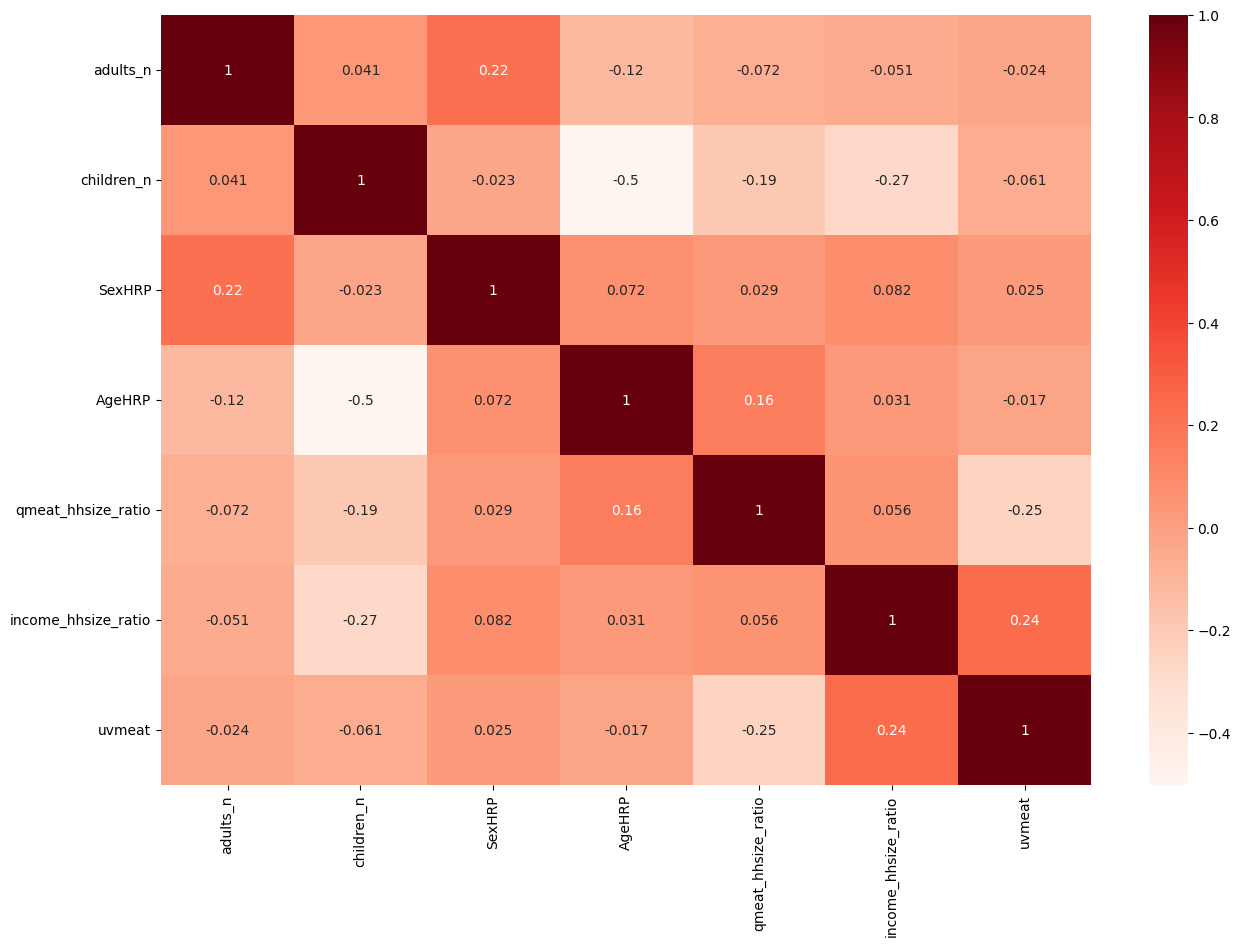

In [12]:
import seaborn as sns
corr = df[df.columns].corr(numeric_only = True
                           )
plt.figure(figsize = (15, 10))
sns.heatmap(corr, cmap = 'Reds', annot=True);

Split the data into *predicting variables* and *target*.

In [13]:
target = 'qmeat_hhsize_ratio'
X = df.drop(target, axis = 1)
y = df[target]

## Show the two dimensional scatter plots for all the predicting variables (**X**) wrt the target (**y**).

In [14]:
ncols=3
import math
nrows = math.ceil((df.shape[1]-1)/ncols)
figwidth = ncols * 7
figheigth = nrows * 5

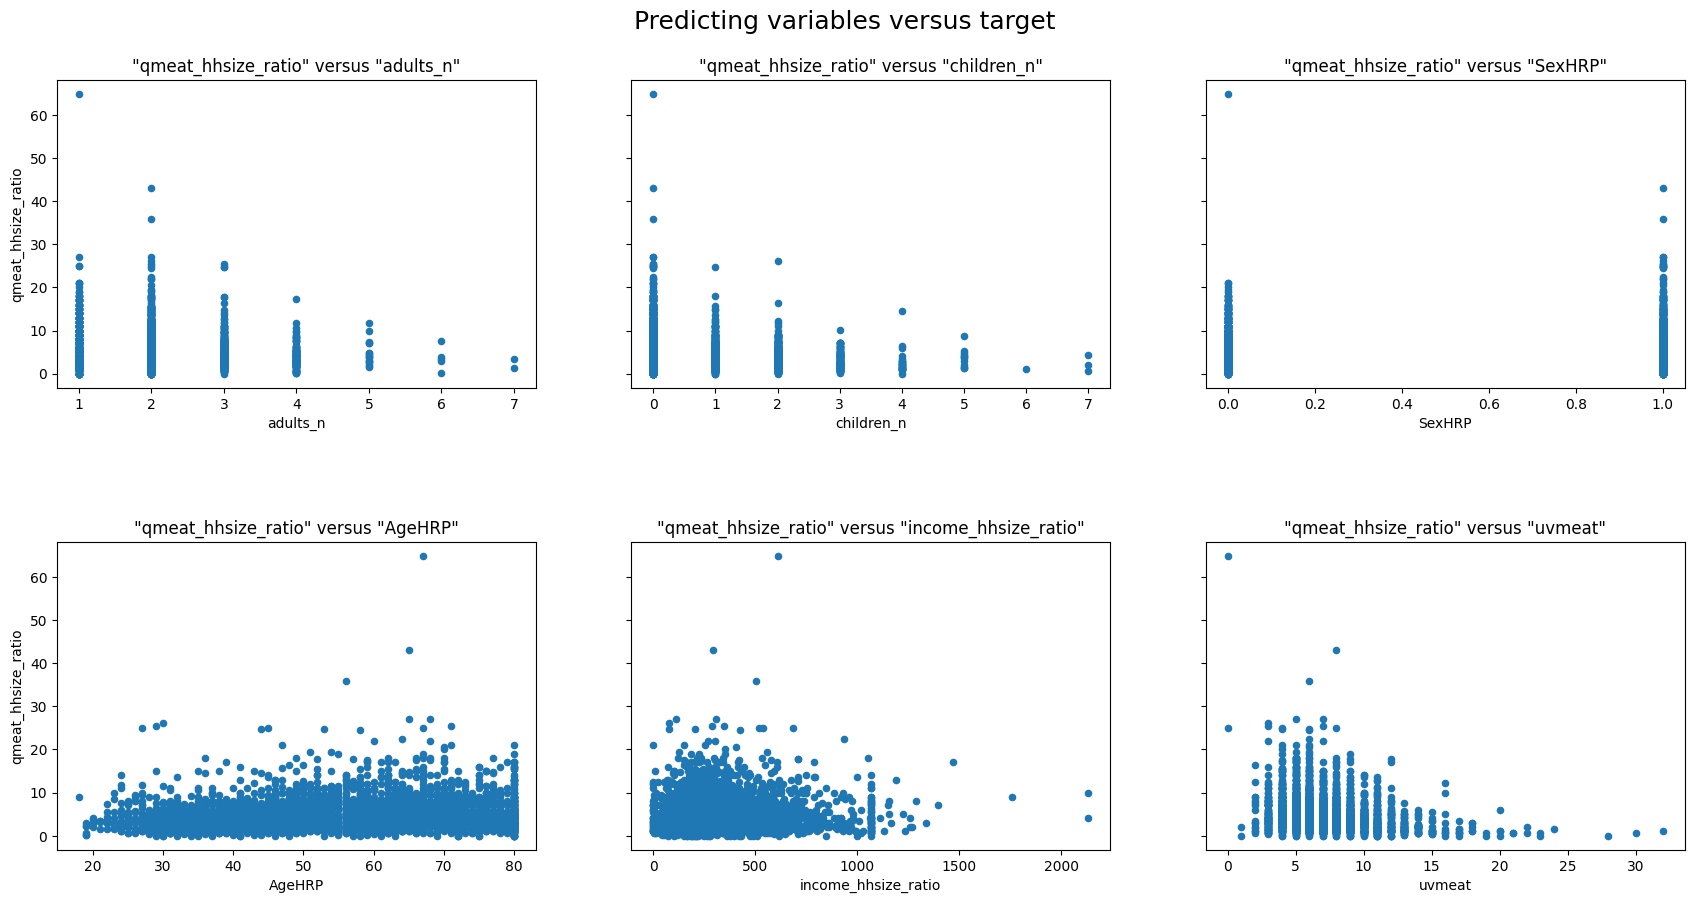

In [15]:
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(figwidth, figheigth),sharey=True)
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Predicting variables versus target", fontsize=18, y=0.95)

for c, ax in zip(df.drop(target,axis=1).columns,axs.ravel()):
    df.sort_values(by=c).plot.scatter(x=c,y=target
                                    , title = '"{}" versus "{}"'.format(target,c)
                                    , ax=ax)

### Show the *_p-values_* of the target with respect to the variables

In [16]:
from sklearn.feature_selection import f_regression

_, p_values = f_regression(X, y)
p_values_show = pd.DataFrame({'Variable':X.columns, 'p_value': p_values})
p_values_show

,Variable,p_value
0,adults_n,2.129304e-05
1,children_n,1.387513e-30
2,SexHRP,8.955155e-02
3,AgeHRP,2.004282e-21
4,income_hhsize_ratio,9.931297e-04
5,uvmeat,3.008983e-51


#### Split the data into *train* and *test*  

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = random_state, train_size=0.7)
print('Training set and test set have {} and {} elements respectively'.format(X_train.shape[0],X_test.shape[0]))

Training set and test set have 2412 and 1034 elements respectively


## First Experiment:
Compute the regression on a single predicting variable, **Univariate Regression**

*Simple Linear Regression*: (https://towardsdatascience.com/machine-learning-basics-simple-linear-regression-bc83c01baa07)

In [18]:
# Consider a reduced dataset containing the chosen variable and the target
# Chosen variable: adults_n
# Target: qmeat_hhsize_ratio
pred_var = 'adults_n'
X_train_r = X_train[pred_var].values.reshape(-1,1) # Transform a series into a one-column array
X_test_r = X_test[pred_var].values.reshape(-1,1)  # (-1,1) if the data has a single feature

Fit the `linear_model` estimator on the training set and predict the target for the test set using the *fitted* estimator

In [19]:
from sklearn.linear_model import LinearRegression
linear_uni = LinearRegression()
linear_uni.fit(X_train_r, y_train)  # Fitted estimator
y_train_pred_uni = linear_uni.predict(X_train_r)
y_test_pred_uni = linear_uni.predict(X_test_r)

#### Compute the regression coefficients and the quality measures

Create a function to compute the F-statistic and p-value of the regression model

In [20]:
import scipy.stats


# Computation of F-statistic and p-value for the regression
# http://facweb.cs.depaul.edu/sjost/csc423/documents/f-test-reg.htm
def f_test(y_true, y_pred, n_var, n_obs, sn=.95):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    n = n_obs
    p = n_var+1 # number of regression parameters (coefficients + intercept)
    y_true_m = np.mean(y_true)
    SSM = np.sum((y_pred-y_true_m)**2)
    SSE = np.sum((y_true-y_pred)**2)
    SST = np.sum((y_true-y_true_m)**2)
    DFT = n - 1
    DFM = p - 1 # degrees of freedom for model - numerator
    DFE = n - p # degrees of freedom for error - denominator
    DFT = n - 1
    MSM = SSM / DFM
    MSE = SSE / DFE 
    MST = SST / DFT

    # Compute the test statistic assuming that the null hypothesis is true:
    # F = MSM / MSE = (explained variance) / (unexplained variance)
    F = MSM / MSE
    p = 1-scipy.stats.f.cdf(F, DFM, DFE) #find p-value of F test statistic 
    return F, p

#### Compute the statistical significance of the model

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

#perform F-test
f_statistic_uni, p_value_uni = f_test(y_train, y_train_pred_uni
                                    , X_train_r.shape[1], X_train_r.shape[0])

# The coefficient
coeff_uni = linear_uni.coef_[0] # the coefficient is returned as a one-element list
intercept_uni = linear_uni.intercept_

# The root mean squared error
rmse_uni = mean_squared_error(y_test, y_test_pred_uni, squared=False) # mean_squared_error(y_true, y_pred)

# Coefficient of determination = 1 is perfect prediction
r2_uni = r2_score(y_test, y_test_pred_uni)

# The results are assembled in a dataframe for a compact view
pd.DataFrame({'Univariate Linear - Value' : [intercept_uni
                        , coeff_uni
                        , rmse_uni
                        , r2_uni
                        , f_statistic_uni
                        , p_value_uni]}
            , index = ['Intercept for "{}"'.format(pred_var)
                     , 'Coefficient for "{}"'.format(pred_var)
                     , 'rmse'
                     , 'r2'
                     , 'f-statistic'
                     , 'p-value'])

,Univariate Linear - Value
"Intercept for ""adults_n""",5.624927
"Coefficient for ""adults_n""",-0.319362
rmse,3.893622
r2,0.007361
f-statistic,9.370178
p-value,0.002230


## Second Experiment

Compute the regression considering all the predicting variables, **Multivariate Regression**

*Multiple Linear Regression*: (https://towardsdatascience.com/machine-learning-basics-multiple-linear-regression-9c70f796e5e3)

In [22]:
# Use the entire data for fitting and predicting

linear_multi = LinearRegression()
linear_multi.fit(X_train,y_train)

y_train_pred_multi = linear_multi.predict(X_train)
y_test_pred_multi = linear_multi.predict(X_test)

#### Fit, predict and show the results

Show the *regression coefficients* resulting from the fitting.

In particular, *positive coefficients* indicate that the target *increases* with the variable, *negative coefficients* indicate a *decreasing* trend.

The absolute values of the coefficient cannot be considered directly a measure of importance, due to the possibly different orders of magnitude of the data in the different columns (observe above the outputs of `describe`).

In [23]:
# Show the coefficients of the predicting variables
pd.DataFrame({'Variable': X.columns, 'Coefficient': linear_multi.coef_})

,Variable,Coefficient
0,adults_n,-0.312357
1,children_n,-0.645113
2,SexHRP,0.370441
3,AgeHRP,0.015088
4,income_hhsize_ratio,0.000969
5,uvmeat,-0.386133


In [24]:
# Statistical significance

_, p_values = f_regression(X_train, y_train_pred_multi)
p_values_show = pd.DataFrame({'Variable': X.columns, 'p-value': p_values})
p_values_show

,Variable,p-value
0,adults_n,1.922561e-18
1,children_n,1.182869e-190
2,SexHRP,6.309905e-10
3,AgeHRP,4.695061e-121
4,income_hhsize_ratio,2.931199e-08
5,uvmeat,0.000000e+00


In [25]:
# Compute the quality measures

#perform F-test
f_statistic_multi, p_value_multi = f_test(y_train, y_train_pred_multi
                                        , X_train.shape[1], X_train.shape[0])
                                        
# The mean squared error
rmse_multi = mean_squared_error(y_test, y_test_pred_multi, squared=False)
# print("The MSE for the multivariate linear regression of '{}' is: {:8.2f}"\
#     .format(target, rmse_dt))
# Coefficient of determination=1 is perfect prediction
r2_multi = r2_score(y_test, y_test_pred_multi)
# print("The 'R square' for the multivariate linear regression of '{}' is: {:8.2f}"\
#     .format(target, r2_dt))
pd.DataFrame({'Multivariate Linear - Value' : [rmse_multi
                        , r2_multi]}
            , index = ['rmse'
                     , 'r2'])

# The results are assembled in a dataframe for a compact view
pd.DataFrame({'Univariate Linear - Value' : [rmse_multi
                        , r2_multi
                        , f_statistic_multi
                        , p_value_multi]}
            , index = ['rmse'
                     , 'r2'
                     , 'f-statistic'
                     , 'p-value']).style.format(precision=4)

,Univariate Linear - Value
rmse,3.6755
r2,0.1155
f-statistic,56.4816
p-value,0.0000


## Third Experiment:

Use the Decision Tree Multivariate Regression, with the entire dataset

*Decision Tree Regression*: (https://towardsdatascience.com/machine-learning-basics-decision-tree-regression-1d73ea003fda)

In [26]:
from sklearn.tree import DecisionTreeRegressor

In [27]:
dt = DecisionTreeRegressor(random_state=random_state)

# Train the model using the training set:

# Fit the tree with default hyperparameters
dt.fit(X_train, y_train);

# Find the maximum depth of the unconstrained tree
max_m_depth = dt.tree_.max_depth
print("The maximum depth of the full Decision Tree Regressor is {}".format(max_m_depth))

The maximum depth of the full Decision Tree Regressor is 28


Exploiting *cross-validation*, find the optimal value of the hyperparameter 'max_depth'

The optimization searches for the *maximum tree depth* guaranteeing the smallest mse. T the end, this operation returns also the *fittest best tree* `best_estimator_`


In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': list(range(1,max_m_depth))}

# Create the grid search cross validation object
dt_gscv = GridSearchCV(estimator=DecisionTreeRegressor(random_state=random_state)
                    , param_grid=param_grid
                    , scoring='neg_mean_squared_error' # select model with minimum mse
                    )
dt_gscv.fit(X_train,y_train);
dt_best = dt_gscv.best_estimator_ # the GridSearchCV returns the best estimator
best_max_depth = dt_best.tree_.max_depth
print("The optimal maximum depth for the decision tree is {}".format(best_max_depth))

The optimal maximum depth for the decision tree is 2


In [29]:
# Make predictions using the test set
y_test_pred_dt = dt_best.predict(X_test)

rmse_dt = mean_squared_error(y_test, y_test_pred_dt, squared=False)

print("Decision Tree Regression - RMSE = {:.2f}".format(rmse_dt))

Decision Tree Regression - RMSE = 3.79


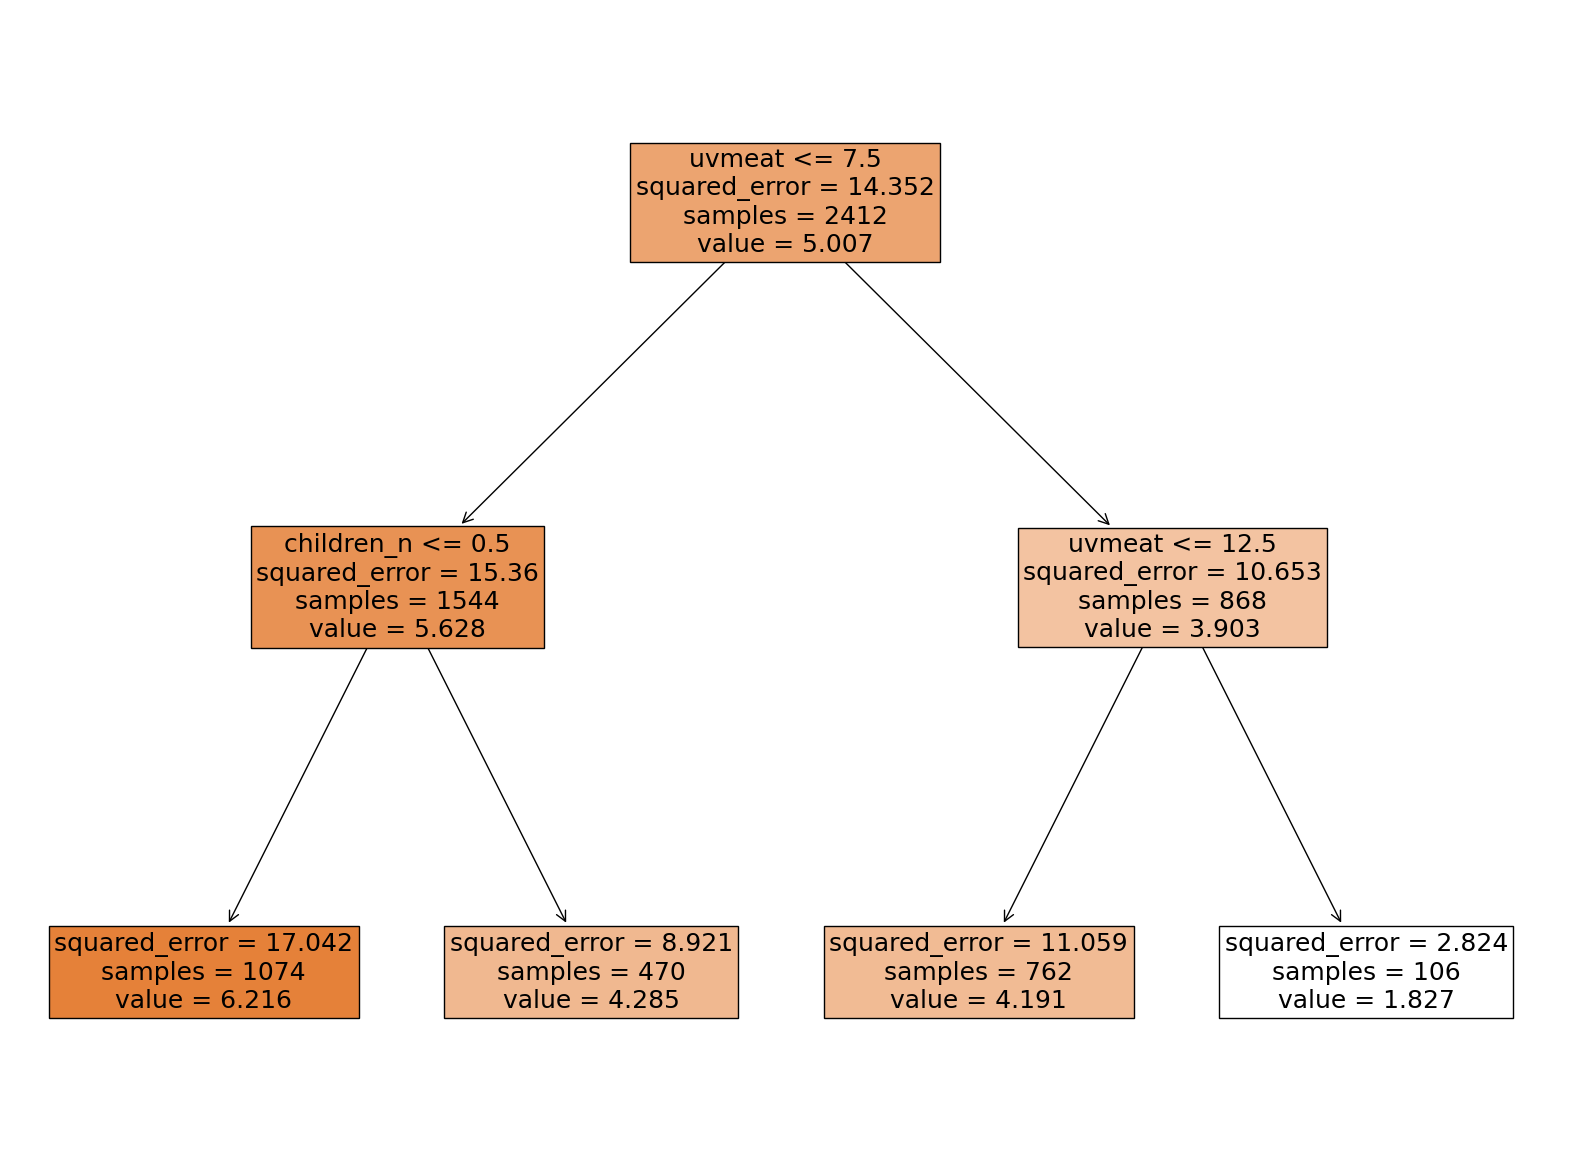

In [30]:
# Show the tree
from sklearn.tree import plot_tree
from matplotlib.pyplot import figure

figure(figsize = (20,15))
plot_tree(dt_best
          , filled = True # fills nodes with colors related to classes
                          # darker color means higher purity
          , feature_names = X.columns
          # , max_depth=2
          , fontsize=18
        #   , class_names = df[target].unique()
         );

## Fourth Experiment

Exploit the Random Forest Regressor

*Random Forest Regression*: (https://towardsdatascience.com/machine-learning-basics-random-forest-regression-be3e1e3bb91a)

The Decision Tree algorithm has a major disadvantage in that it causes over-fitting. This problem can be limited by implementing the **Random Forest Regression** in place of the Decision Tree Regression. Additionally, the Random Forest algorithm is also very fast and robust than other regression models.

In [31]:
# Create Random Forest regression object
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=random_state)
# For simplicity, we use as a maximum maximum depth of the tree the value found in
# the unconstrained decision tree fitting
param_grid_rf = {'max_depth': list(range(1,max_m_depth))}

# Create the grid search with cross validation
rf_gscv = GridSearchCV(rf, param_grid=param_grid_rf
                        , scoring='neg_mean_squared_error') # Look for minimum mean square error

# Train the model using the training set
rf_gscv.fit(X_train, y_train)

# The grid search returns the best estimator
rf = rf_gscv.best_estimator_

In [32]:
print("The optimal maximum depth for the trees in the random forest is {}".format(rf.max_depth))

The optimal maximum depth for the trees in the random forest is 4


In [33]:
y_test_pred_rf = rf.predict(X_test)
rmse_rf = mean_squared_error(y_test, y_test_pred_rf, squared=False)
print("Random Forest Regression - RMSE = {:.2f}".format(rmse_rf))

Random Forest Regression - RMSE = 3.57


## Final observations
### Linear regression
The multivariate regression with all the predicting variables available with respect to the univariate regression has 
- lower RMSE 
- higher coefficient of determination 
- the p-value suggests the acceptance of both models

### Decision Tree and Random Forest regression
- Decistion Tree has an RMSE slightly higher than multivariate linear regression
- Random Forest has an RMSE slightly lower than multivariate linear regression